# K Means Algo

In [44]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import nbformat
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
X = df[['Latitude','Longitude', 'MedInc']]
X.head()


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [47]:
X_train, X_test = tts(X, test_size=0.2, random_state=42)

### Paso 2: Construye un K-Means 
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. 

In [48]:
model = KMeans(n_clusters=6)
model.fit(X_train)
y_train = model.predict(X_train)

A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. 

In [49]:
X_train['cluster'] = y_train
X_train['cluster'].value_counts()

cluster
0    4729
2    4262
3    2987
1    2412
5    1785
4     337
Name: count, dtype: int64

Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

In [50]:
X_train['cluster'].dtypes

dtype('int32')

In [51]:
clusters = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C',
            3: 'Cluster D', 4: 'Cluster E', 5: 'Cluster F'}

X_train['cluster'] = X_train['cluster'].map(clusters)
X_train['cluster'].value_counts()

cluster
Cluster A    4729
Cluster C    4262
Cluster D    2987
Cluster B    2412
Cluster F    1785
Cluster E     337
Name: count, dtype: int64

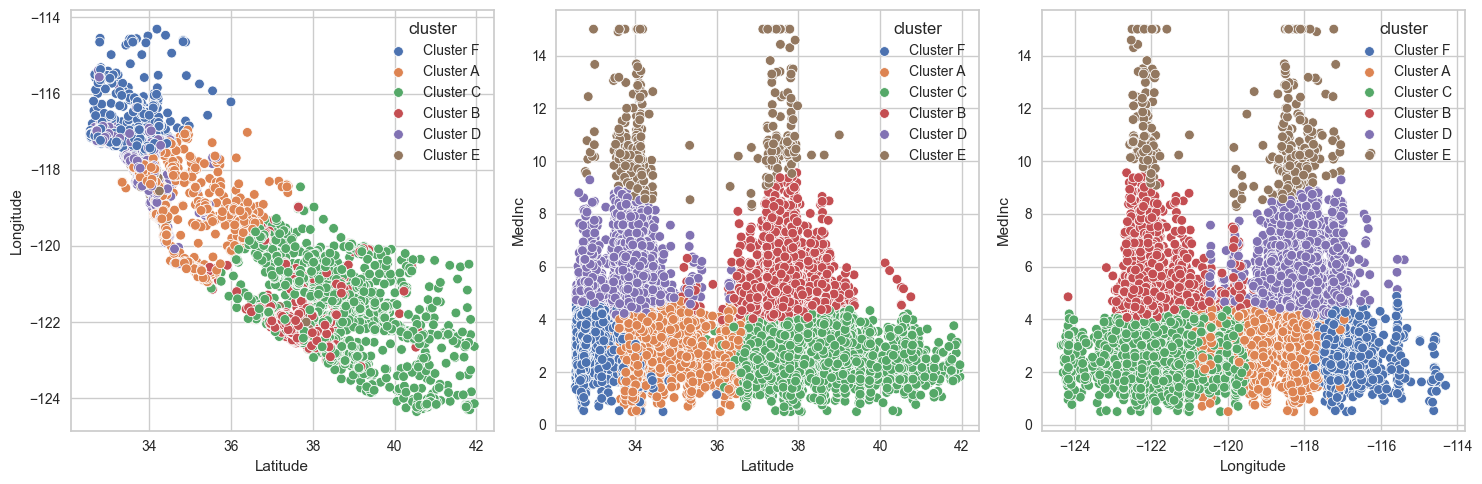

In [52]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = 'cluster', palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = 'cluster', palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = 'cluster', palette = "deep")
plt.tight_layout()

plt.show()

In [53]:
# Ahora en 3d
fig = px.scatter_3d(X_train, x = "Latitude", y = "Longitude", z = "MedInc", color = "cluster", width = 1000, height = 500,
                    size = X_train["MedInc"].abs())
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

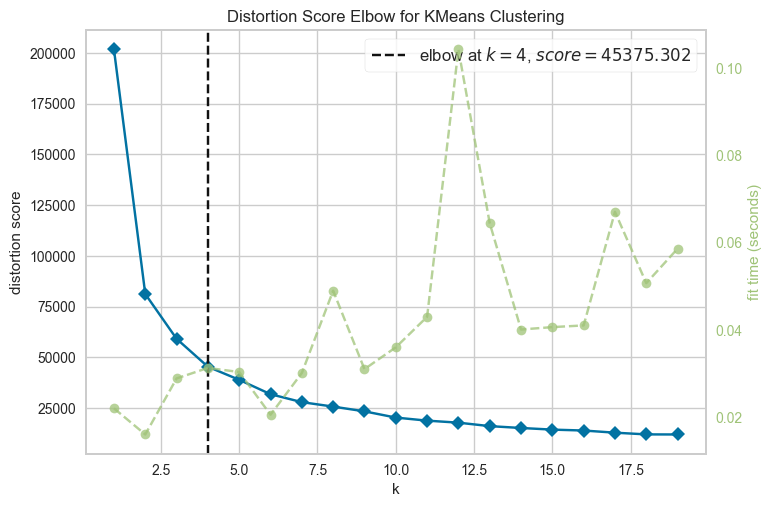

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
# Voy a revisar si esta bien que sean 6 clusters los indicados:
X_train_noclus = X_train.drop('cluster', axis=1)

# Primero con el metodo de Elbow
elbow_viz = KElbowVisualizer(KMeans(), k=(1,20))
elbow_viz.fit(X_train_noclus)
elbow_viz.show()

In [67]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
  cluster_labels = KMeans(n_clusters=k,random_state=42).fit_predict(X_train_noclus)
  silhouette_scores.append(silhouette_score(X_train_noclus, cluster_labels))
silhouette_scores

MemoryError: Unable to allocate 1.00 GiB for an array with shape (8128, 16512) and data type float64